In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\data set.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,09-06-2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,16-01-2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,29-06-2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,21-06-2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,21-07-2016 10:54,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,03-01-2016 03:22,1
9996,41.73,28,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,28-05-2016 12:20,0
9997,55.60,39,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,05-01-2016 11:53,0
9998,46.61,50,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,04-04-2016 07:07,1


## Exploratory Data Analysis (EDA): I used popular Python libraries such as pandas, NumPy, seaborn, and matplotlib to explore and understand the data.


In [3]:
df.head(100)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,09-06-2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,16-01-2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,29-06-2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,21-06-2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,21-07-2016 10:54,1
...,...,...,...,...,...,...,...,...,...,...
95,50.19,36,32549.95,141.52,Ameliorated actuating workforce,Youngfort,Male,Indonesia,03-01-2016 16:01,1
96,73.93,33,43974.49,196.77,Multi-tiered foreground Graphic Interface,Silvaton,Female,Brazil,12-05-2016 21:32,1
97,39.30,29,53431.35,158.56,Mandatory coherent groupware,Christinetown,Female,Chile,14-01-2016 00:23,0
98,55.60,54,53188.69,182.20,Virtual scalable secured line,West James,Female,South Africa,16-01-2016 23:37,1


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily Time Spent on Site,1.000000,0.100129,0.016288,-0.058930,0.091034
Age,0.100129,1.000000,-0.051198,-0.106603,0.460383
Area Income,0.016288,-0.051198,1.000000,0.041495,-0.067631
Daily Internet Usage,-0.058930,-0.106603,0.041495,1.000000,-0.129412
Clicked on Ad,0.091034,0.460383,-0.067631,-0.129412,1.000000


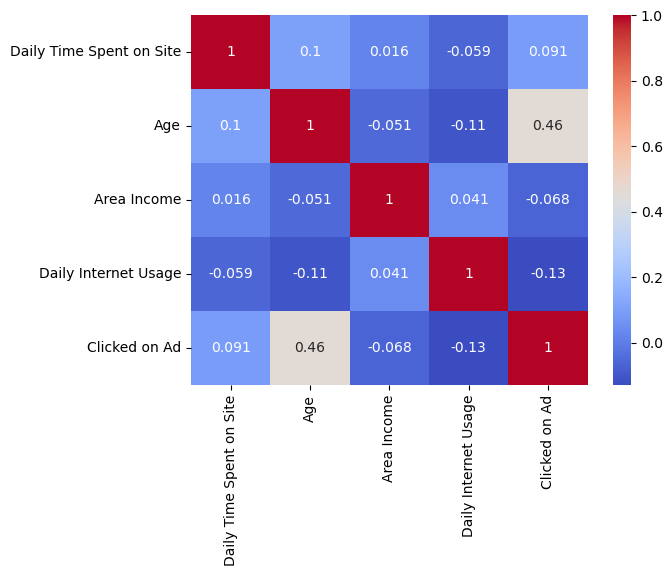

In [7]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df.Country.value_counts()

Australia                                       388
Czech Republic                                  330
Turkey                                          312
Qatar                                           224
Hong Kong                                       221
                                               ... 
South Georgia and the South Sandwich Islands      1
Wallis and Futuna                                 1
Sierra Leone                                      1
Niue                                              1
Paraguay                                          1
Name: Country, Length: 207, dtype: int64

In [9]:
df.Country.value_counts().index

Index(['Australia', 'Czech Republic', 'Turkey', 'Qatar', 'Hong Kong',
       'Bangladesh', 'Burundi', 'Algeria', 'Vanuatu', 'Bolivia',
       ...
       'Saint Barthelemy', 'Guinea-Bissau', 'Mozambique', 'Seychelles',
       'Monaco', 'South Georgia and the South Sandwich Islands',
       'Wallis and Futuna', 'Sierra Leone', 'Niue', 'Paraguay'],
      dtype='object', length=207)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [11]:
df.shape

(10000, 10)

In [12]:
# Finding categorical features
cv= [x for x in df.columns if df[x].dtype=='O']
print('There are {} categorical variables'.format(len(cv)))
print(cv)

There are 5 categorical variables
['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']


In [13]:
# Finding numerical features
nv=[x for x in df.columns if x not in cv]
print('There are {} numerical features'.format(len(nv)))
print(nv)


There are 5 numerical features
['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']


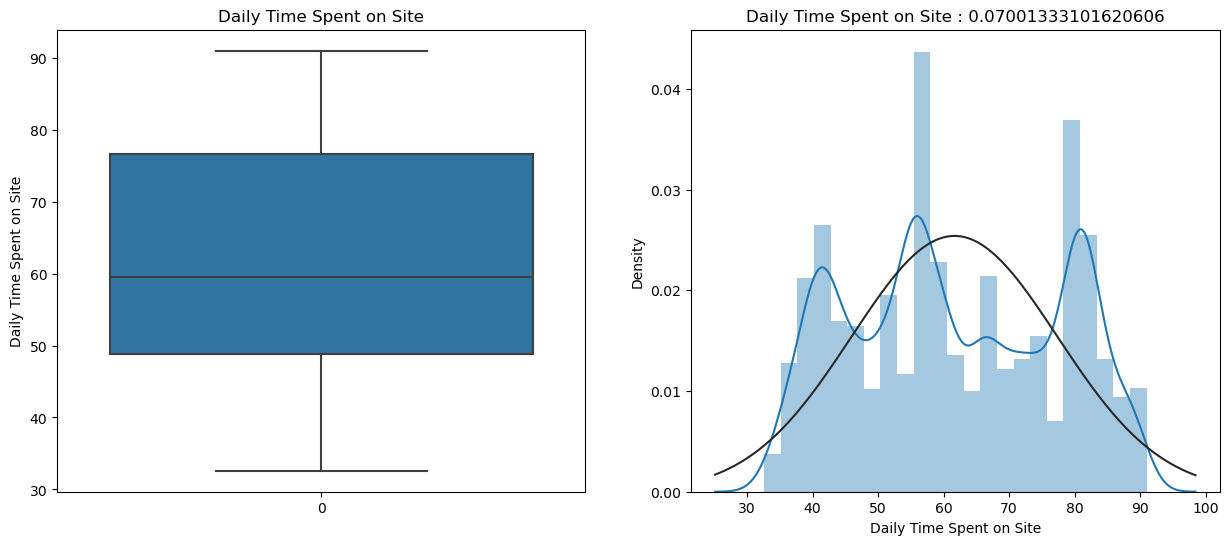

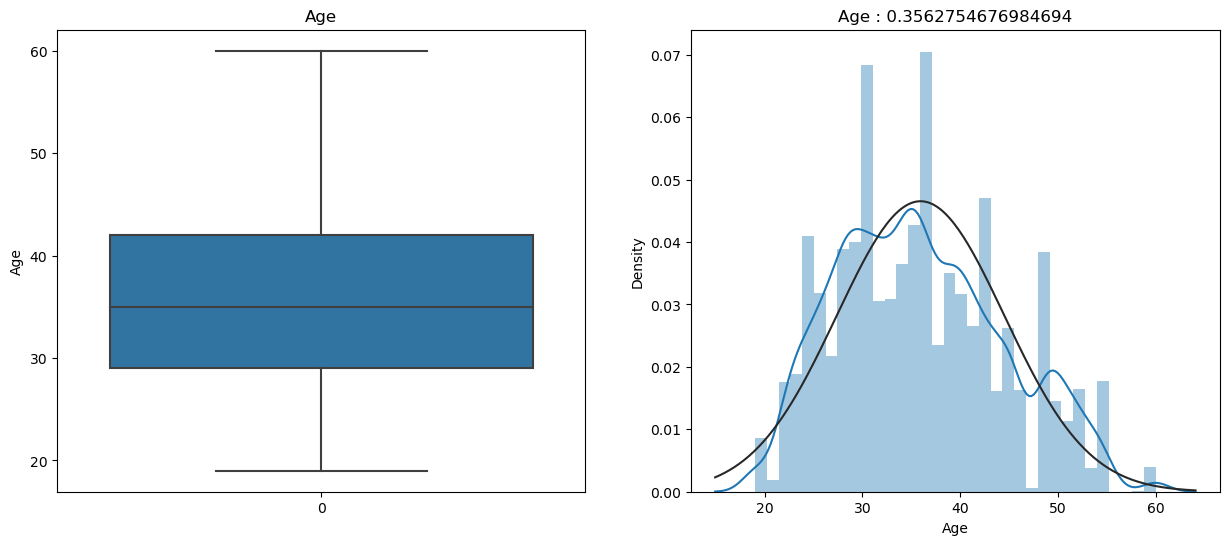

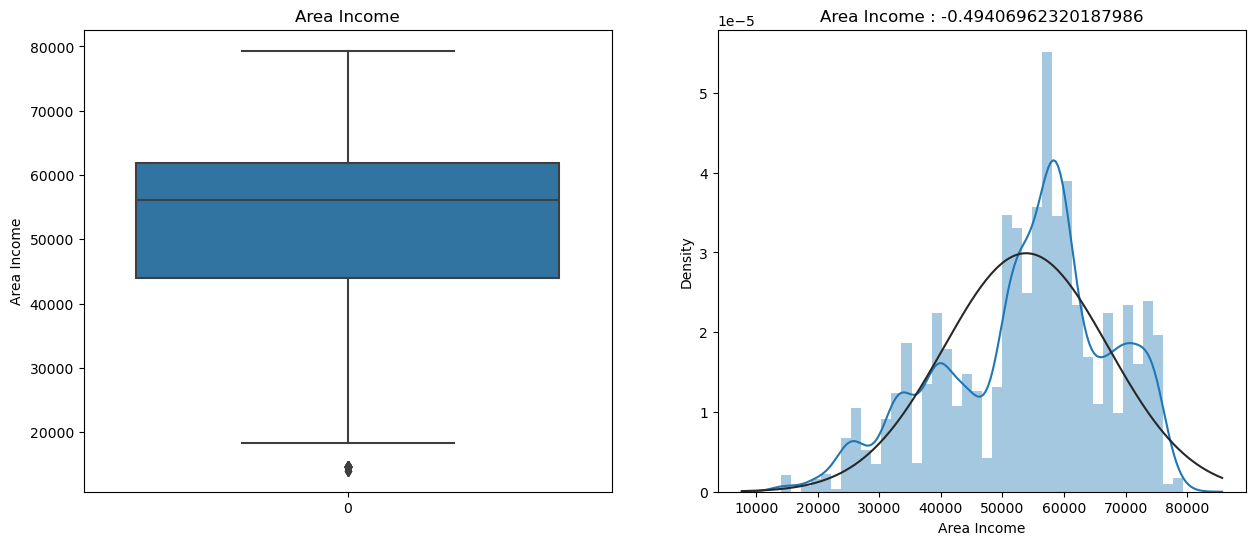

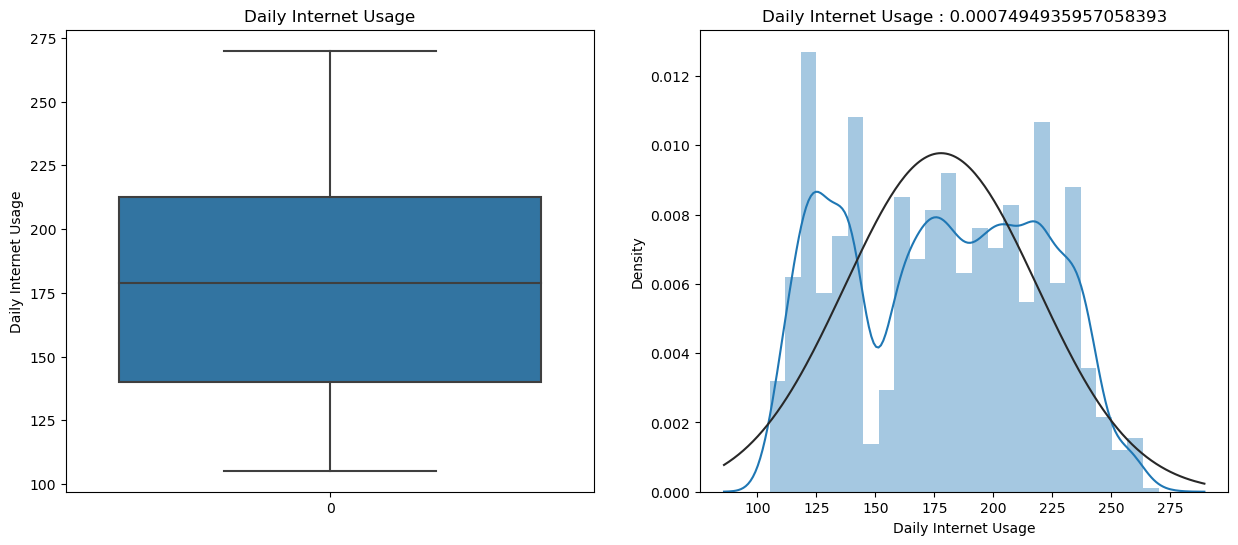

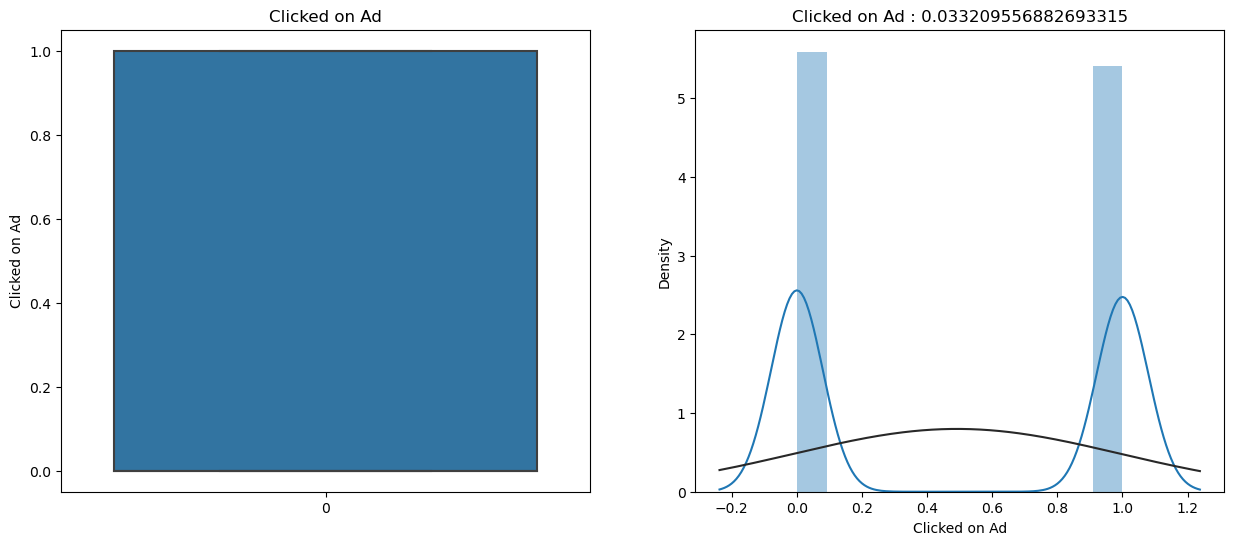

In [14]:
for var in nv:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var],fit = norm)
    ax.set_title(f'{var} : {df[var].skew()}')
    ax.set_xlabel(var)
    
    plt.show()

In [15]:
df1= df.copy()

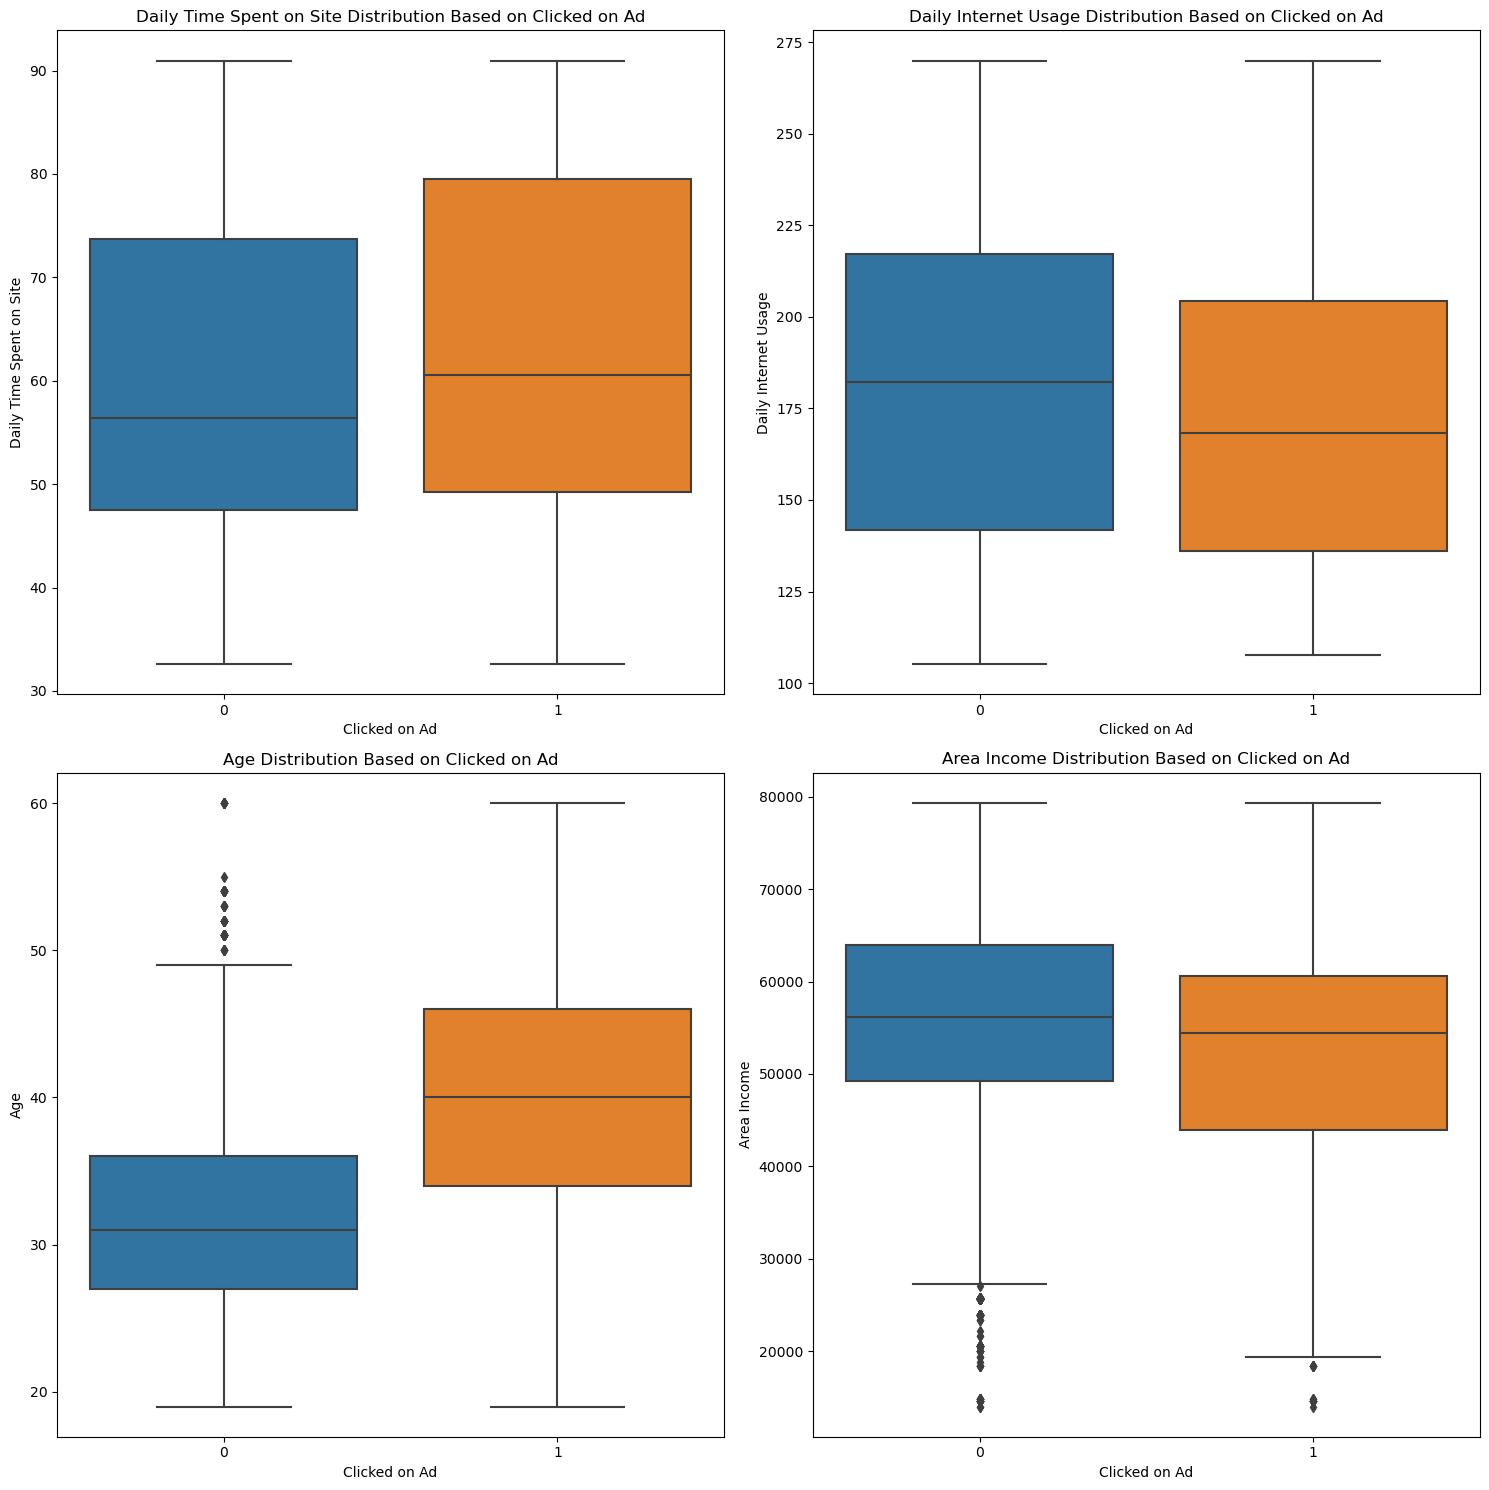

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15,15 ))

sns.boxplot(data=df1, y='Daily Time Spent on Site', x='Clicked on Ad', orient='v', ax=axes[0,0])
axes[0,0].set_title("Daily Time Spent on Site Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Daily Internet Usage', x='Clicked on Ad', orient='v', ax=axes[0,1])
axes[0,1].set_title("Daily Internet Usage Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Age', x='Clicked on Ad', orient='v', ax=axes[1,0])
axes[1,0].set_title("Age Distribution Based on Clicked on Ad")

sns.boxplot(data=df1, y='Area Income', x='Clicked on Ad', orient='v', ax=axes[1,1])
axes[1,1].set_title("Area Income Distribution Based on Clicked on Ad")

plt.tight_layout()
plt.show()

## .Users spending time on site more than an hour have almost equal chances to click and not to click on ad.
 ## . Users who are using less internet on daily basis have the potential to click on ads.
## .Ads are more likely to be clicked on by users between 35-50
.
## .Area Income have negligible effect on ads clicking.

### Feature Engineering

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [18]:
df1 = df1.astype({"Timestamp": object})

In [19]:
categorical_variables=df1.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']


In [20]:
df1['Gender'] = df1['Gender'].map({'Female':1,'Male':0})

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  int64  
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [22]:
df1

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32,69481.85,172.83,Decentralized real-time circuit,Lisafort,0,Svalbard & Jan Mayen Islands,09-06-2016 21:43,0
1,41.73,31,61840.26,207.17,Optional full-range projection,West Angelabury,0,Singapore,16-01-2016 17:56,0
2,44.40,30,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,1,Guadeloupe,29-06-2016 10:50,0
3,59.88,28,56180.93,207.17,Balanced empowering success,New Michael,1,Zambia,21-06-2016 14:32,0
4,49.21,30,54324.73,201.58,Total 5thgeneration standardization,West Richard,1,Qatar,21-07-2016 10:54,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31,61840.26,207.17,Profound executive flexibility,West Angelabury,0,Singapore,03-01-2016 03:22,1
9996,41.73,28,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,0,Luxembourg,28-05-2016 12:20,0
9997,55.60,39,38067.08,124.44,Intuitive exuding service-desk,North Randy,1,Egypt,05-01-2016 11:53,0
9998,46.61,50,43974.49,123.13,Realigned content-based leverage,North Samantha,1,Malawi,04-04-2016 07:07,1


## calculating ctr of ads
Now let’s calculate the overall Ads click-through rate. Here we need to calculate the ratio of users who clicked on the ad to users who left an impression on the ad. So let’s see the distribution of users

In [23]:
df1["Clicked on Ad"].value_counts()

0    5083
1    4917
Name: Clicked on Ad, dtype: int64

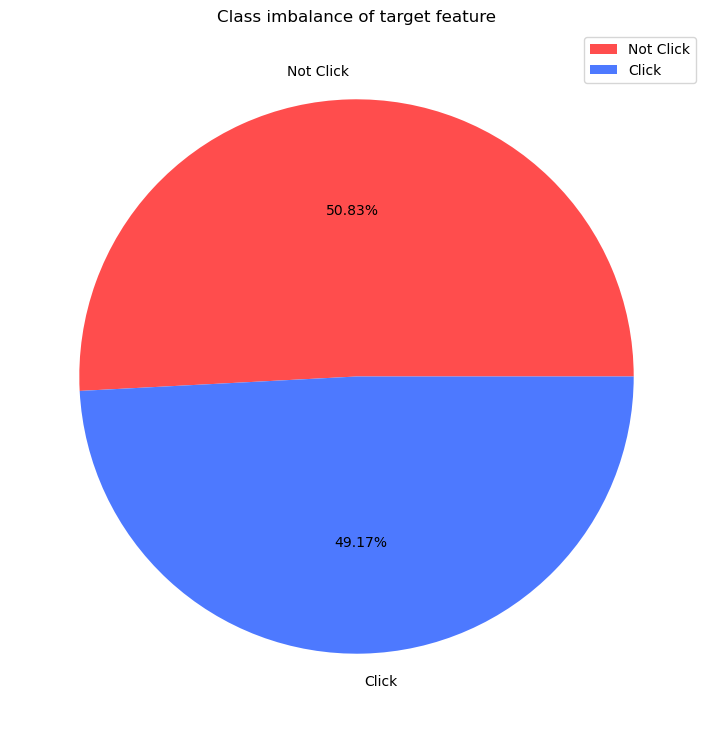

In [24]:
labels = ['Not Click', 'Click'] 
size = df1['Clicked on Ad'].value_counts() 
colors = ['#ff4d4d', '#4d79ff']  
plt.figure(figsize=(9,9)) 
plt.pie(size, colors=colors, labels=labels,autopct='%.2f%%')
plt.axis('off') 
plt.title("Class imbalance of target feature") 
plt.legend()
plt.show()

In [25]:
x = df1.drop(columns='Clicked on Ad').copy()  
y = df1['Clicked on Ad'].copy()

x.drop(columns = ['Ad Topic Line', 'City', 'Country','Timestamp'], inplace=True)


In [26]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
print(f'Shape of X_train : {x_train.shape}')
print(f'Shape of X_test : {x_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7000, 5)
Shape of X_test : (3000, 5)
Shape of y_train : (7000,)
Shape of y_test : (3000,)


In [28]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender
9069,88.04,44,50723.67,137.24,1
2603,71.28,36,32549.95,141.52,0
7738,80.30,52,39031.89,113.80,1
1579,81.58,25,25686.34,141.89,0
5058,81.98,34,59785.94,160.03,1


In [29]:
y_train.head()

9069    1
2603    1
7738    1
1579    0
5058    0
Name: Clicked on Ad, dtype: int64

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  int64  
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  int64  
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 781.4+ KB


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MODEL BUILDING

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
def result_summarizer_for_train(y_train,y_train_pred):
    
    print('Training set evaluation result :\n')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)
    
    print("Accuracy: ", accuracy_train*100)
    print("Precision: ", precision_train*100)
    print("Recall: ", recall_train*100)
    print("F1 Score: ", f1_train*100)
    print("roc_auc_score: ", roc_auc_score_train*100)

In [34]:
def result_summarizer_for_test(y_test,y_test_pred):
    
    print('Test set evaluation result :\n')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)
    
    print("Accuracy: ", accuracy_test*100)
    print("Precision: ", precision_test*100)
    print("Recall: ", recall_test*100)
    print("F1 Score: ", f1_test*100)
    print("roc_auc_score: ", roc_auc_score_test*100)

In [35]:
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_train_pred)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0], fmt='d', cmap='Blues')
    ax1.set_title('Confusion Matrix for Training Set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred)
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[1], fmt='d', cmap='Blues')
    ax2.set_title('Confusion Matrix for Test Set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')

    plt.show()

In [36]:
def plot_roc_curve(y_test, y_pred,y_pred_prob):
    
    y_test = y_test.ravel()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob)
    # Plotting the ROC curve 
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve') 
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

## LOGISTICS REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(x_train_scaled, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(x_train_scaled)
y_test_pred_lr = model_lr.predict(x_test_scaled)
y_pred_prob_lr = model_lr.predict_proba(x_test_scaled)

y_pred_prob_lr = y_pred_prob_lr[:, 1]


LogisticRegression()


In [38]:
result_summarizer_for_train(y_train,y_train_pred_lr)

Training set evaluation result :

Accuracy:  72.32857142857144
Precision:  73.09675462541705
Recall:  69.65317919075144
F1 Score:  71.33343199644813
roc_auc_score:  72.2983410078051


In [39]:
result_summarizer_for_test(y_test,y_test_pred_lr)

Test set evaluation result :

Accuracy:  71.86666666666667
Precision:  72.5202057310801
Recall:  67.74193548387096
F1 Score:  70.04968062455643
roc_auc_score:  71.75171952417786


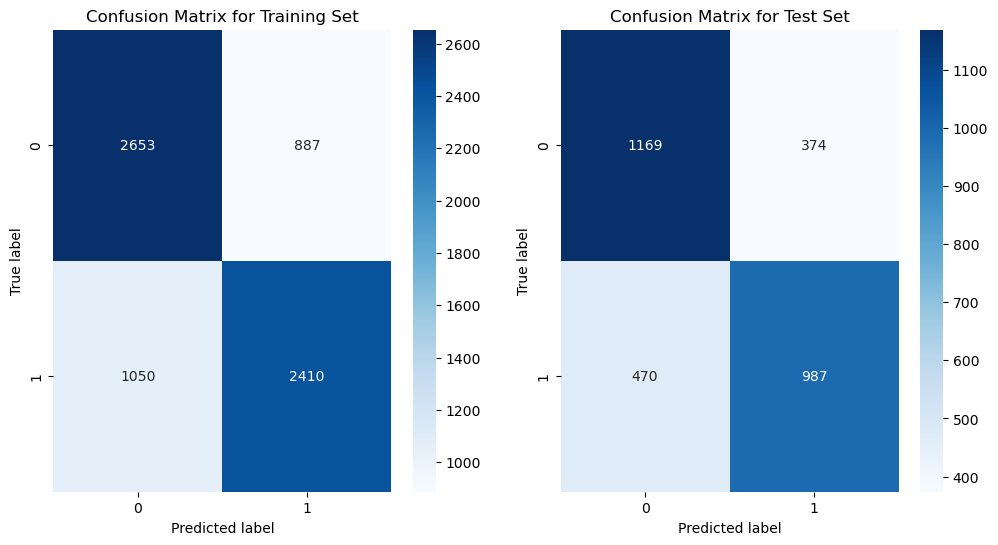

In [40]:
visualize(y_train, y_train_pred_lr, y_test, y_test_pred_lr)

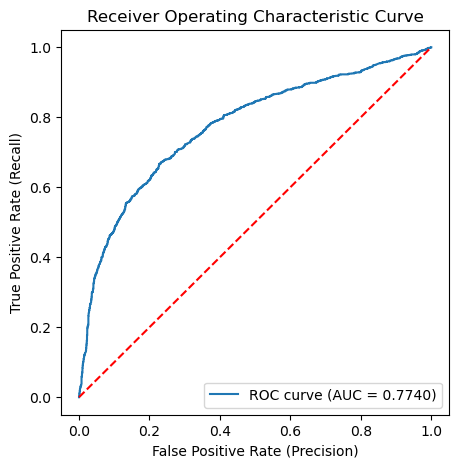

In [41]:
plot_roc_curve(y_test, y_test_pred_lr,y_pred_prob_lr)

## Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB  

model_nb = GaussianNB()  
model_nb.fit(x_train_scaled, y_train)
print(model_nb)

y_train_pred_nb = model_nb.predict(x_train_scaled)
y_test_pred_nb = model_nb.predict(x_test_scaled)
y_pred_prob_nb = model_nb.predict_proba(x_test_scaled)

y_pred_prob_nb = y_pred_prob_nb[:, 1]

GaussianNB()


In [43]:
result_summarizer_for_train(y_train,y_train_pred_nb)

Training set evaluation result :

Accuracy:  72.21428571428572
Precision:  75.34292405486784
Recall:  65.08670520231213
F1 Score:  69.84028531555279
roc_auc_score:  72.13374808138205


In [44]:
result_summarizer_for_test(y_test,y_test_pred_nb)

Test set evaluation result :

Accuracy:  72.1
Precision:  75.53542009884679
Recall:  62.93754289636239
F1 Score:  68.66342193934855
roc_auc_score:  71.84466256937367


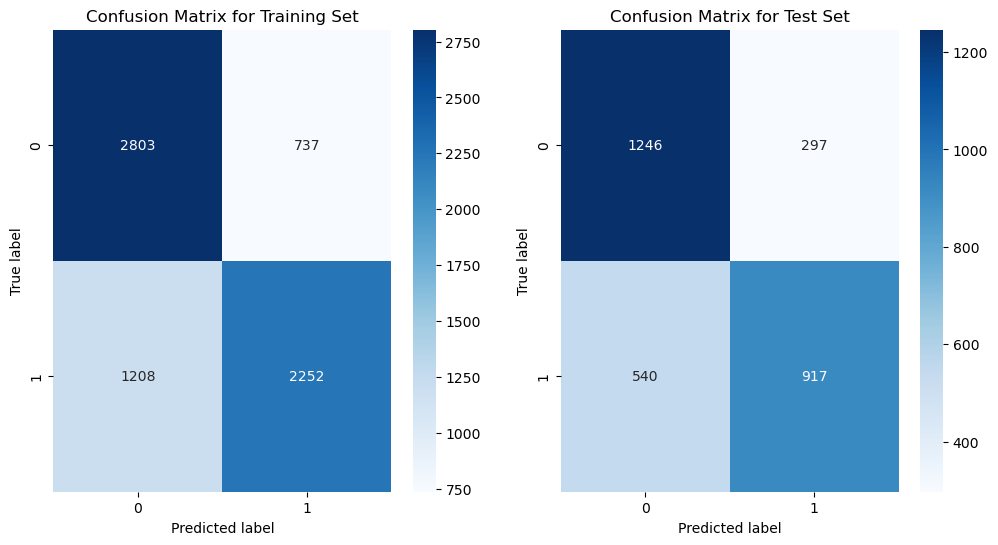

In [45]:
visualize(y_train, y_train_pred_nb, y_test, y_test_pred_nb)

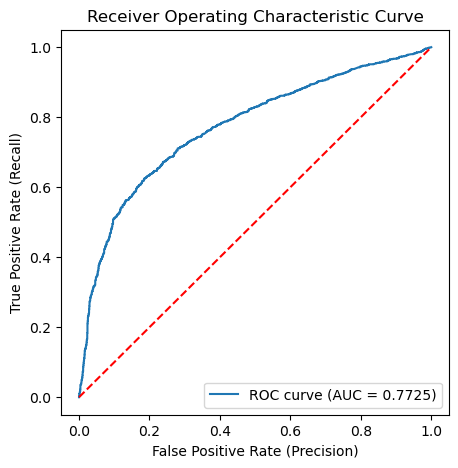

In [46]:
plot_roc_curve(y_test, y_test_pred_nb,y_pred_prob_nb)

## DecisionTree

In [47]:
from sklearn.tree import DecisionTreeClassifier  

# Checking Max Depth
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model_dt = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

In [48]:
results

[0.714,
 0.731,
 0.739,
 0.76,
 0.7606666666666667,
 0.7553333333333333,
 0.7446666666666667,
 0.748,
 0.7473333333333333,
 0.7423333333333333]

In [49]:
results = []
max_features_options = ['auto',None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)

In [50]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = trees)
    model_dt.fit(x_train, y_train)
    y_test_pred_dt = model_dt.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_dt)
    results.append(accuracy)


In [51]:
model_dt= DecisionTreeClassifier(max_depth=12, random_state=101, max_features = None, min_samples_leaf = 15,criterion='entropy')   
model_dt.fit(x_train, y_train)
print(model_dt)

y_train_pred_dt = model_dt.predict(x_train)
y_test_pred_dt = model_dt.predict(x_test)
y_pred_prob_dt = model_dt.predict_proba(x_test)

y_pred_prob_dt = y_pred_prob_dt[:, 1]

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=15,
                       random_state=101)


In [52]:
result_summarizer_for_train(y_train,y_train_pred_dt)

Training set evaluation result :

Accuracy:  80.98571428571428
Precision:  81.84265629673946
Recall:  79.07514450867052
F1 Score:  80.43510216081141
roc_auc_score:  80.96412592665165


In [53]:
result_summarizer_for_test(y_test,y_test_pred_dt)

Test set evaluation result :

Accuracy:  74.86666666666667
Precision:  75.52650689905592
Recall:  71.37954701441318
F1 Score:  73.39449541284405
roc_auc_score:  74.76948834842499


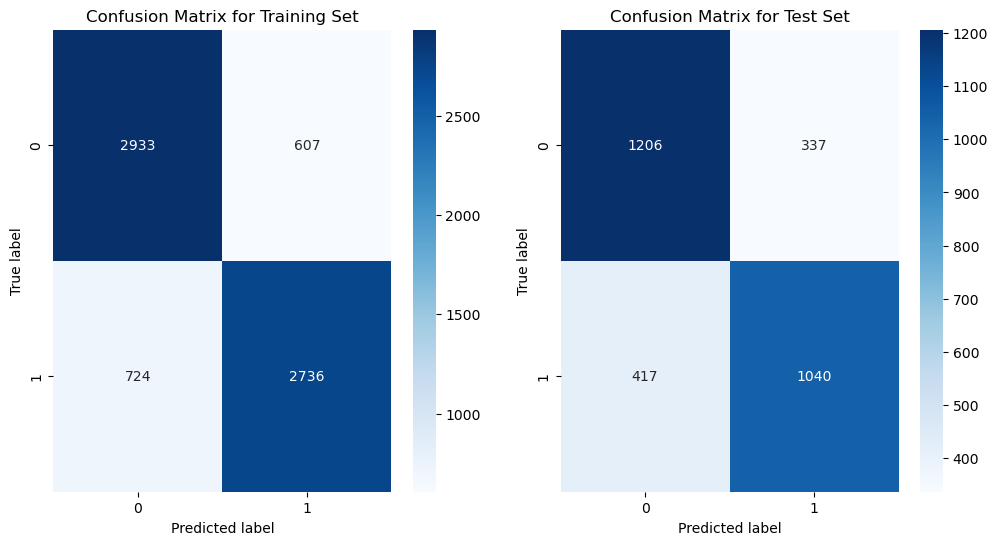

In [54]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_dt)

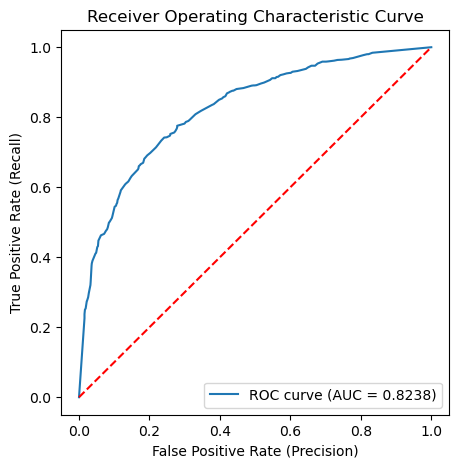

In [55]:
plot_roc_curve(y_test, y_test_pred_dt,y_pred_prob_dt)

## RandomForest

In [56]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimator_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimator_options:
    model_rf = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

In [57]:
results

[0.77,
 0.768,
 0.772,
 0.7686666666666667,
 0.7696666666666667,
 0.7693333333333333,
 0.7703333333333333,
 0.7696666666666667,
 0.7716666666666666,
 0.7716666666666666,
 0.7706666666666667,
 0.772,
 0.774,
 0.7713333333333333,
 0.7696666666666667,
 0.7716666666666666,
 0.774]

In [58]:
results = []
max_features_options = [None,'sqrt',0.95,0.75,0.5,0.25,0.10]
for trees in max_features_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)

In [59]:
results

[0.7716666666666666,
 0.7696666666666667,
 0.7723333333333333,
 0.7743333333333333,
 0.7696666666666667,
 0.7703333333333333,
 0.7703333333333333]

In [60]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model_rf = RandomForestClassifier(n_estimators=90, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model_rf.fit(x_train, y_train)
    y_test_pred_rf = model_rf.predict(x_test)
    accuracy = np.mean(y_test==y_test_pred_rf)
    results.append(accuracy)


In [61]:
model_rf= RandomForestClassifier(n_estimators=95, oob_score=True, n_jobs=-1, random_state=101, max_features = 'sqrt', min_samples_leaf = 1)
model_rf.fit(x_train, y_train)
print(model_rf)

y_train_pred_rf = model_rf.predict(x_train)
y_test_pred_rf = model_rf.predict(x_test)
y_pred_prob_rf = model_rf.predict_proba(x_test)

y_pred_prob_rf = y_pred_prob_rf[:, 1]

RandomForestClassifier(n_estimators=95, n_jobs=-1, oob_score=True,
                       random_state=101)


In [62]:
result_summarizer_for_train(y_train,y_train_pred_rf)

Training set evaluation result :

Accuracy:  96.82857142857144
Precision:  97.70182675309368
Recall:  95.83815028901735
F1 Score:  96.76101546542165
roc_auc_score:  96.81738022925444


In [63]:
result_summarizer_for_test(y_test,y_test_pred_rf)

Test set evaluation result :

Accuracy:  77.16666666666666
Precision:  77.1830985915493
Recall:  75.22306108442004
F1 Score:  76.19047619047619
roc_auc_score:  77.11250267442


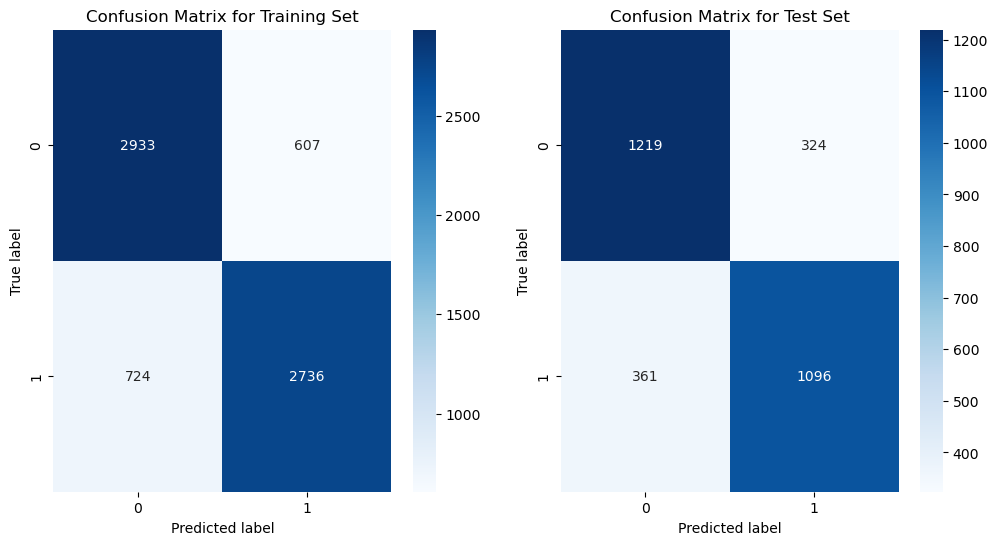

In [64]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_rf)

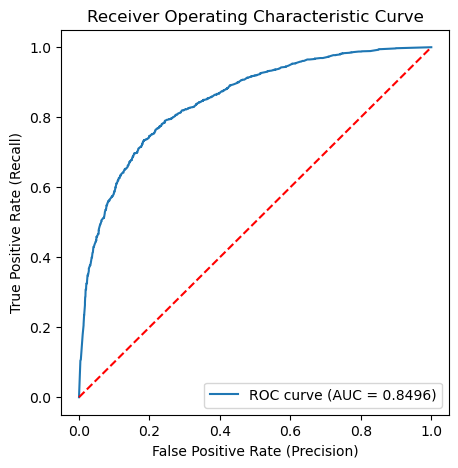

In [65]:
plot_roc_curve(y_test, y_test_pred_rf,y_pred_prob_rf)

## K- Nearest Neighbour 

In [66]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,51):    
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train_scaled,y_train)
    y_test_pred_knn = model_knn.predict(x_test_scaled)
    error_rate.append(np.mean(y_test_pred_knn != y_test))

In [67]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train_scaled,y_train)
print(model_knn)

y_train_pred_knn= model_knn.predict(x_train_scaled)
y_test_pred_knn= model_knn.predict(x_test_scaled)
y_pred_prob_knn= model_knn.predict_proba(x_test_scaled)

y_pred_prob_knn = y_pred_prob_knn[:, 1]

KNeighborsClassifier(n_neighbors=3)


In [68]:
result_summarizer_for_train(y_train,y_train_pred_knn)

Training set evaluation result :

Accuracy:  84.28571428571429
Precision:  85.07728894173603
Recall:  82.71676300578035
F1 Score:  83.88042203985931
roc_auc_score:  84.26798602266419


In [69]:
result_summarizer_for_test(y_test,y_test_pred_knn)

Test set evaluation result :

Accuracy:  71.43333333333334
Precision:  71.45922746781116
Recall:  68.56554564172959
F1 Score:  69.98248686514886
roc_auc_score:  71.35341442812337


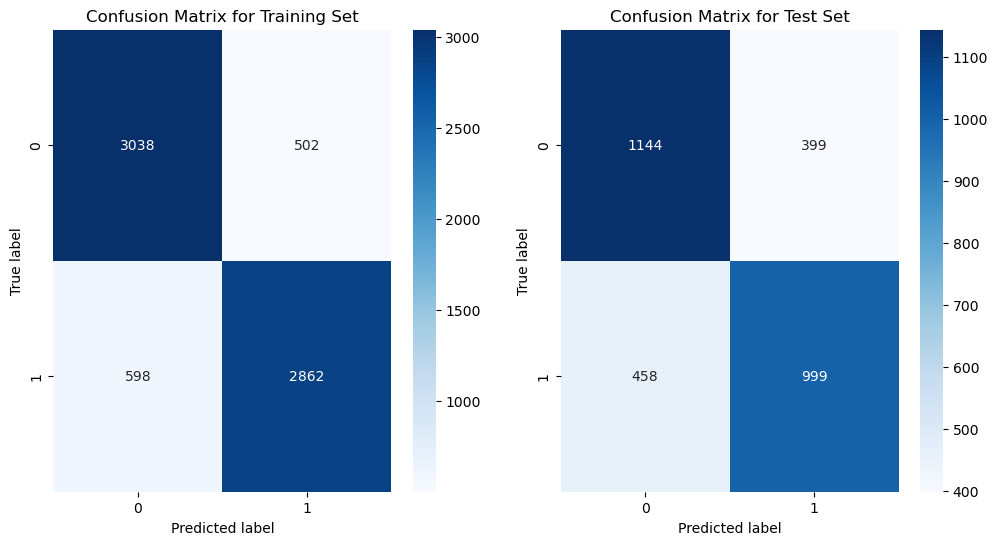

In [70]:
visualize(y_train, y_train_pred_knn, y_test, y_test_pred_knn)

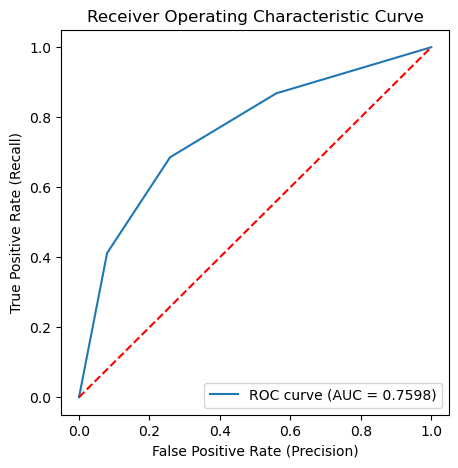

In [71]:
plot_roc_curve(y_test, y_test_pred_knn,y_pred_prob_knn)

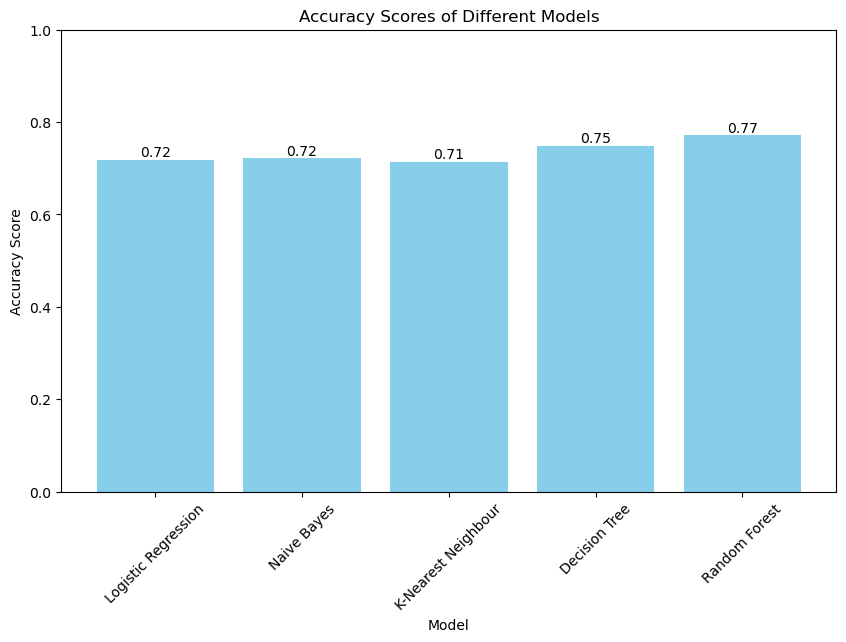

In [72]:
accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest']
accuracy_scores = [accuracy_lr,accuracy_nb,accuracy_knn,accuracy_dt,accuracy_rf]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy scores)

# Display the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

## XG BOOST

In [73]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [75]:
model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False  # if you get a warning, this can be useful
)

In [76]:
x = df1.drop(columns='Clicked on Ad').copy()  
y = df1['Clicked on Ad'].copy()

x.drop(columns = ['Ad Topic Line', 'City', 'Country','Timestamp'], inplace=True)


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

In [79]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred = model.predict(x_test)

In [81]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7926666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1543
           1       0.80      0.77      0.78      1457

    accuracy                           0.79      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.79      0.79      0.79      3000



In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.1, 0.01, 0.001],
    "n_estimators": [100, 200, 300],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bytree": [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=3)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

In [83]:
best_params

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 1.0}

In [84]:
y_pred = grid_search.predict(x_test)

In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7926666666666666
